# <center> Project: Birmingham food hygiene rating data </center>

By Bashar Mohammad, 6 January 2022

The data provides the food hygiene rating or inspection result given to a business and reflects the standards of food hygiene found on the date of inspection or visit by the local authority. Businesses include restaurants, pubs, cafés, takeaways, hotels and other places consumers eat, as well as in supermarkets and other food shops. The data is held on behalf of local authorities participating in the Food Standards Agency's national Food Hygiene Rating Scheme (FHRS) in England, Northern Ireland and Wales or the Food Hygiene Information Scheme (FHIS) in Scotland. Data is only available for local authority areas running either of these schemes. We will analyze the data:

- Which area in Birmingham does have the highest mean score, given that score is equal to the sum of the three score components?

- Reveal the geographical count distribution of the permises?

- Using the mean hygiene score, which type of business is the most hygienic? 
- Show the count distribution of permises across business types?

- Which permise does is the most hygienic across business types?

- Is there any correlation among the component score?

- Which university/college does have the best score?



https://data.gov.uk/dataset/d4988f8e-0862-4e2f-afc4-9dad8c7f7879/uk-food-hygiene-rating-data-west-midlands-food-standards-agency

In [1]:
import xml.etree.ElementTree as ETree
import pandas as pd
import numpy as np

## Loading data from XML files

In [2]:
# Read data from an XML file
prstree = ETree.parse('birmingham_hygiene.xml')

In [6]:
# Get the root element
root = prstree.getroot()
root

<Element 'FHRSEstablishment' at 0x7f71e939cb80>

In [7]:
store_items = []
all_items = []

In [8]:
# Iterate through the root node to extract the text values of each attribute 

In [9]:
root[1][0].find('LocalAuthorityName').text

'Birmingham'

In [10]:
for store in root.iter('EstablishmentDetail'):
    
    BusinessType = store.find('BusinessType').text
    BusinessName = store.find('BusinessName').text
    
    if store.find('PostCode') is not None:
        PostCode = store.find('PostCode').text
    else:
        PostCode=np.NaN

    LocalAuthorityName=store.find('LocalAuthorityName').text

  # Get the respective store items with specifications as a unit appended to a list
    store_items = [BusinessType, BusinessName,LocalAuthorityName, PostCode]
    all_items.append(store_items)

In [11]:
df_stores = pd.DataFrame(all_items, columns=['BusinessType', 'BusinessName','LocalAuthorityName','PostCode'])

In [12]:
score_items=[]
all_scores=[]

In [13]:
for score in root.iter('Scores'):
    
    if score.find('Hygiene') is not None:
        Hygiene = score.find('Hygiene').text
    else:
        Hygiene=np.NaN
        
    if score.find('Structural') is not None:
        Structural = score.find('Structural').text
    else:
        Structural=np.NaN
    
            
    if score.find('ConfidenceInManagement') is not None:
        ConfidenceInManagement = score.find('ConfidenceInManagement').text
    else:
        ConfidenceInManagement=np.NaN


  
    score_items = [Hygiene, Structural,ConfidenceInManagement]
    all_scores.append(score_items)

In [14]:
df_scores = pd.DataFrame(all_scores, columns=['Hygiene', 'Structural','ConfidenceInManagement'])
df_scores

,Hygiene,Structural,ConfidenceInManagement
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,10,5,5
4,NaN,NaN,NaN
...,...,...,...
9697,NaN,NaN,NaN
9698,NaN,NaN,NaN
9699,15,25,30
9700,NaN,NaN,NaN


In [15]:
df=pd.concat([df_stores, df_scores], axis=1)

In [37]:
df.columns

Index(['BusinessType', 'BusinessName', 'LocalAuthorityName', 'PostCode',
       'Hygiene', 'Structural', 'ConfidenceInManagement', 'Zone', 'Score'],
      dtype='object')

In [16]:
df.head(7)

,BusinessType,BusinessName,LocalAuthorityName,PostCode,Hygiene,Structural,ConfidenceInManagement
0,Restaurant/Cafe/Canteen,& More Coffee House,Birmingham,B4 6AT,NaN,NaN,NaN
1,Retailers - other,?,Birmingham,NaN,NaN,NaN,NaN
2,Other catering premises,@EDYS CAKE,Birmingham,NaN,NaN,NaN,NaN
3,Restaurant/Cafe/Canteen,@PIZZA,Birmingham,B2 4BF,10,5,5
4,Retailers - other,1 Stop Food and Drinks,Birmingham,B28 9LS,NaN,NaN,NaN
5,Restaurant/Cafe/Canteen,100 Degrees East,Birmingham,B13 9EF,15,10,10
6,Other catering premises,1000 Trades,Birmingham,B1 3HE,5,10,5


## Data Cleaning and Preparation

In [17]:
df.isnull().sum()

BusinessType                 0
BusinessName                 0
LocalAuthorityName           0
PostCode                  1128
Hygiene                   3117
Structural                3117
ConfidenceInManagement    3117
dtype: int64

In [18]:
df=df.dropna()
df.shape

(6088, 7)

In [20]:
df.head(3)

,BusinessType,BusinessName,LocalAuthorityName,PostCode,Hygiene,Structural,ConfidenceInManagement
3,Restaurant/Cafe/Canteen,@PIZZA,Birmingham,B2 4BF,10,5,5
5,Restaurant/Cafe/Canteen,100 Degrees East,Birmingham,B13 9EF,15,10,10
6,Other catering premises,1000 Trades,Birmingham,B1 3HE,5,10,5


###  Split the post codes into zones

In [21]:
df['Zone']=df['PostCode'].apply(lambda x:x[0:3])

In [22]:
df['Zone'].unique()

array(['B2 ', 'B13', 'B1 ', 'B23', 'B15', 'B5 ', 'B11', 'B25', 'B29',
       'B26', 'B3 ', 'B14', 'B18', 'B7 ', 'B10', 'B42', 'B21', 'B8 ',
       'B74', 'B73', 'B12', 'B30', 'B6 ', 'B72', 'B19', 'B9 ', 'B33',
       'B16', 'B20', 'B44', 'B27', 'B24', 'B75', 'B17', 'B31', 'B28',
       'B76', 'B45', 'B32', 'B36', 'B35', 'B38', 'B43', 'B4 ', 'B34',
       'B92'], dtype=object)

In [23]:
df['Hygiene']=df['Hygiene'].astype('int64')
df['Structural']=df['Structural'].astype('int64')
df['ConfidenceInManagement']=df['ConfidenceInManagement'].astype('int64')
df['Score']=df['Hygiene']+df['Structural']+df['ConfidenceInManagement']

<AxesSubplot:xlabel='Zone'>

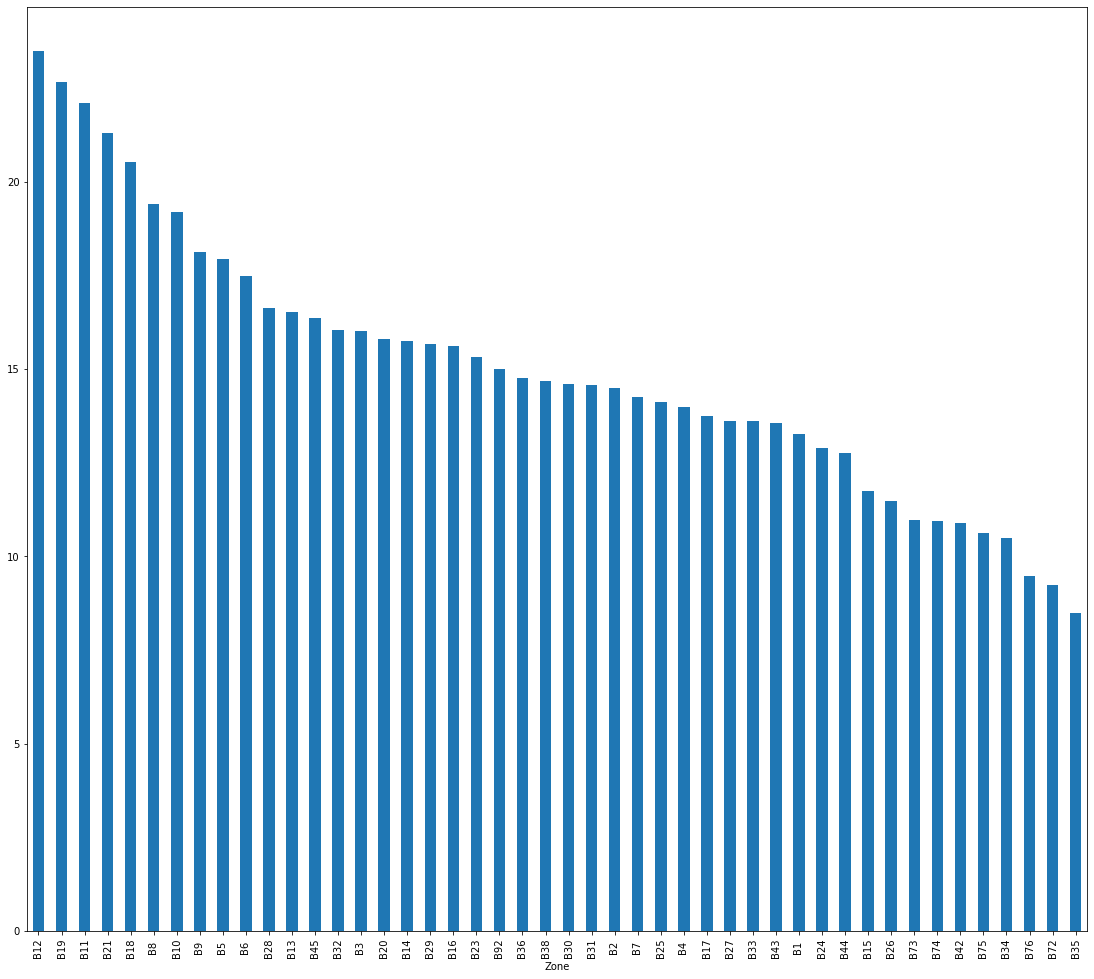

In [24]:
df.groupby('Zone')['Score'].agg('mean').sort_values(ascending=False).plot(kind='bar', figsize=(19,17))

In [25]:
df.groupby('Zone')['Score'].agg('mean').sort_values(ascending=False)

Zone
B12    23.484043
B19    22.662338
B11    22.107623
B21    21.289474
B18    20.529801
B8     19.413146
B10    19.178082
B9     18.125000
B5     17.930464
B6     17.481752
B28    16.636364
B13    16.508876
B45    16.363636
B32    16.050420
B3     16.020408
B20    15.801527
B14    15.756881
B29    15.673077
B16    15.619048
B23    15.320000
B92    15.000000
B36    14.761905
B38    14.672131
B30    14.587912
B31    14.583333
B2     14.487179
B7     14.252336
B25    14.117647
B4     13.989899
B17    13.740157
B27    13.625954
B33    13.622047
B43    13.571429
B1     13.271605
B24    12.884615
B44    12.754491
B15    11.734694
B26    11.474820
B73    10.974576
B74    10.942029
B42    10.887097
B75    10.617284
B34    10.500000
B76     9.482759
B72     9.237288
B35     8.500000
Name: Score, dtype: float64

<AxesSubplot:xlabel='Zone'>

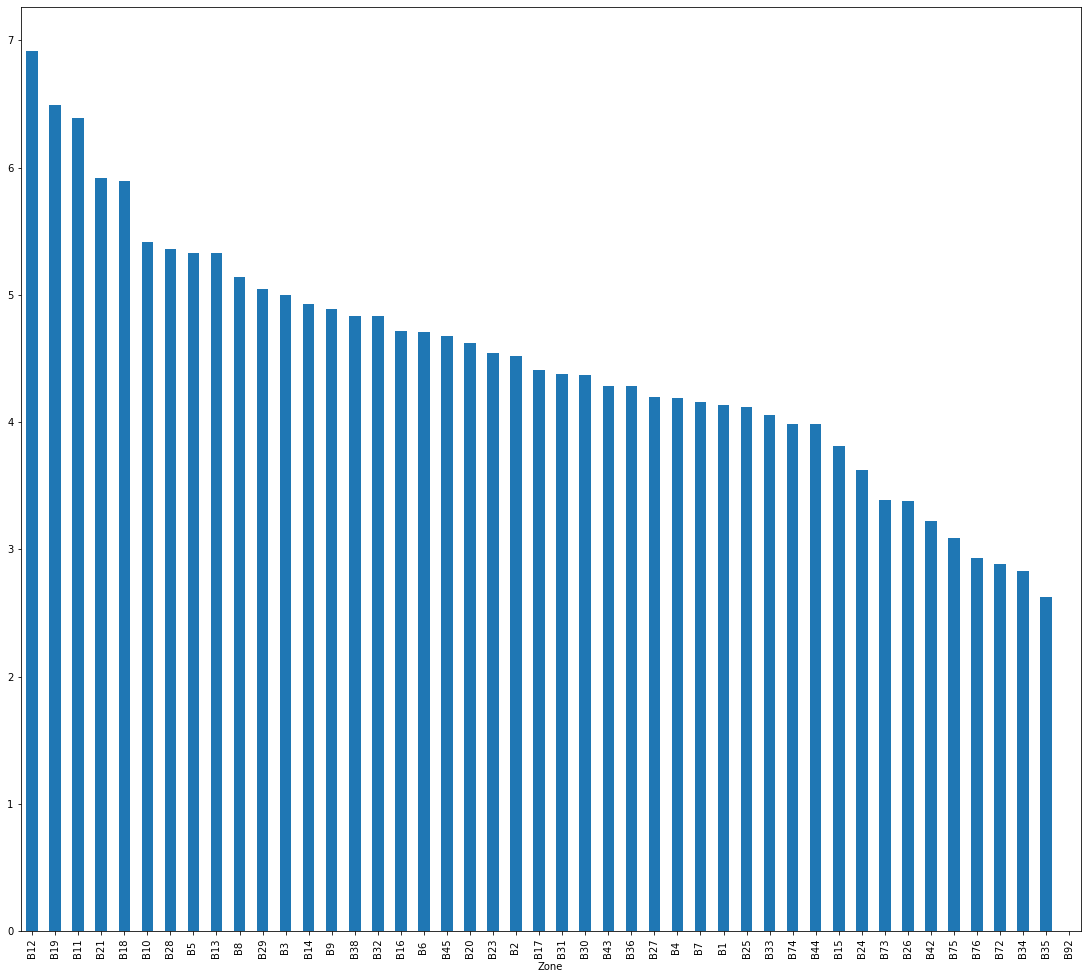

In [26]:
df.groupby('Zone')['Hygiene'].agg('mean').sort_values(ascending=False).plot(kind='bar', figsize=(19,17))

### Geographical count dustribution of the permises 

<AxesSubplot:xlabel='Zone'>

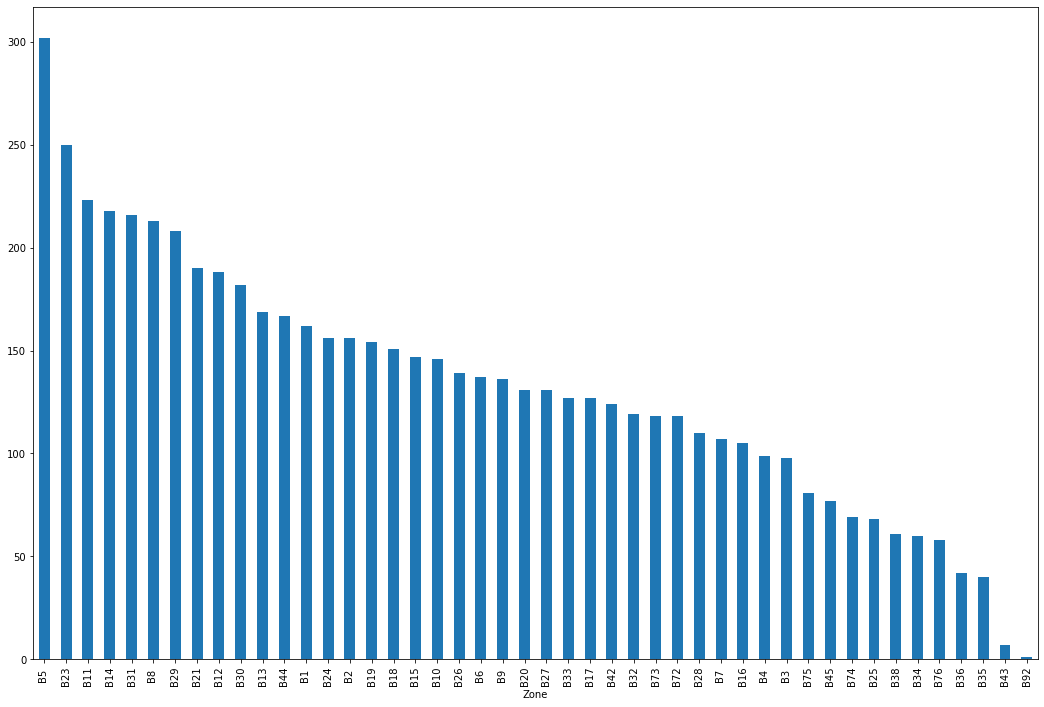

In [23]:
df.groupby('Zone')['Hygiene'].agg('count').sort_values(ascending=False).plot(kind='bar', figsize=(18,12))

The figure shows that the area B5 contains the highest number of permises with just over 300, making it busier than B23. B92 was last on the list with only one permise. 

In [24]:
df[df['Zone']=='B92']['Hygiene']

8899    0
Name: Hygiene, dtype: int64

In [25]:
df.shape

(6088, 9)

### BusinessType

<AxesSubplot:xlabel='BusinessType'>

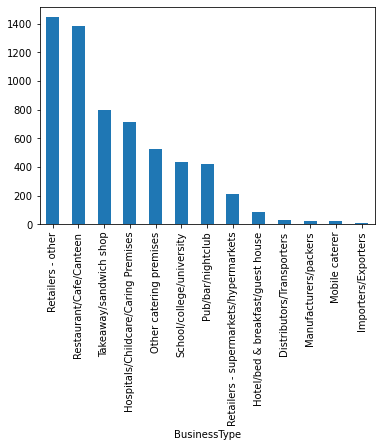

In [26]:
df.groupby('BusinessType')['Hygiene'].agg('count').sort_values(ascending=False).plot(kind='bar')

<ipython-input-27-735cd5d00f8d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('BusinessType')['Hygiene', 'Structural','ConfidenceInManagement'].agg('mean').sort_values(by='Hygiene',ascending=False).plot(kind='bar', stacked=True)


<AxesSubplot:xlabel='BusinessType'>

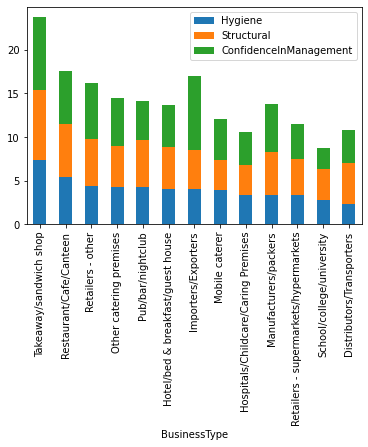

In [27]:
df.groupby('BusinessType')['Hygiene', 'Structural','ConfidenceInManagement'].agg('mean').sort_values(by='Hygiene',ascending=False).plot(kind='bar', stacked=True)

In [71]:
df.groupby('BusinessType')['Hygiene'].agg('mean').sort_values(ascending=False)

BusinessType
Takeaway/sandwich shop                   7.415094
Restaurant/Cafe/Canteen                  5.431159
Retailers - other                        4.352941
Other catering premises                  4.222011
Pub/bar/nightclub                        4.220624
Hotel/bed & breakfast/guest house        4.080460
Importers/Exporters                      4.000000
Mobile caterer                           3.947368
Hospitals/Childcare/Caring Premises      3.338008
Manufacturers/packers                    3.333333
Retailers - supermarkets/hypermarkets    3.333333
School/college/university                2.807425
Distributors/Transporters                2.333333
Name: Hygiene, dtype: float64

Takeaway/sandwich shops are the most hygienic permises with an average hygiene score of about 7.5, heading Restaurant/Cafe/Canteen with 5.43.

Distributors/Transporters came last on the list with 2.33, just after School/college/university.

### The most hygienic store across business types

In [29]:
# Method 1
df.sort_values('Score', ascending=False).drop_duplicates(['BusinessType']).reset_index()


,index,BusinessType,BusinessName,LocalAuthorityName,PostCode,Hygiene,Structural,ConfidenceInManagement,Zone,Score
0,9686,Retailers - other,Zinda Bazaar,Birmingham,B6 5HA,25,25,30,B6,80
1,1952,Takeaway/sandwich shop,Classic Fish Bar,Birmingham,B6 6NT,25,25,30,B6,80
2,157,Other catering premises,African Legacy,Birmingham,B5 4RQ,25,25,30,B5,80
3,1754,Restaurant/Cafe/Canteen,Chaska and Chaii,Birmingham,B12 8JA,25,25,30,B12,80
4,1320,Retailers - supermarkets/hypermarkets,Bucuresti Magazine,Birmingham,B8 2HJ,20,20,30,B8,70
5,8841,Pub/bar/nightclub,The Wellington,Birmingham,B2 5SN,20,20,20,B2,60
6,9056,Hotel/bed & breakfast/guest house,Twist,Birmingham,B2 4BG,20,25,10,B2,55
7,7723,School/college/university,St. Edmund Campion Rc School,Birmingham,B23 5XA,15,15,20,B23,50
8,8936,Mobile caterer,Top Fried Chicken,Birmingham,B8 3DH,15,15,20,B8,50
9,5581,Manufacturers/packers,Mushtaq Sweet Centre,Birmingham,B11 4LD,10,15,20,B11,45


In [30]:
# Method 2
grouped=df.groupby('BusinessType')['Score']
df.loc[grouped.idxmax()]

,BusinessType,BusinessName,LocalAuthorityName,PostCode,Hygiene,Structural,ConfidenceInManagement,Zone,Score
7456,Distributors/Transporters,Snack Attack UK,Birmingham,B11 2AL,0,20,20,B11,40
9074,Hospitals/Childcare/Caring Premises,Uk Asian Womens Centre,Birmingham,B19 1BX,10,15,20,B19,45
9056,Hotel/bed & breakfast/guest house,Twist,Birmingham,B2 4BG,20,25,10,B2,55
6999,Importers/Exporters,Samis Wholesale Cash and Carry,Birmingham,B19 3SU,10,15,10,B19,35
5581,Manufacturers/packers,Mushtaq Sweet Centre,Birmingham,B11 4LD,10,15,20,B11,45
8936,Mobile caterer,Top Fried Chicken,Birmingham,B8 3DH,15,15,20,B8,50
157,Other catering premises,African Legacy,Birmingham,B5 4RQ,25,25,30,B5,80
8841,Pub/bar/nightclub,The Wellington,Birmingham,B2 5SN,20,20,20,B2,60
1754,Restaurant/Cafe/Canteen,Chaska and Chaii,Birmingham,B12 8JA,25,25,30,B12,80
9686,Retailers - other,Zinda Bazaar,Birmingham,B6 5HA,25,25,30,B6,80


#### Drawebacks: 

The methods used above take only the first row with the highest score value, but this would miss permises having the same highest score. To solve this problem, we find the maximum score for each business type and then filter the rows by the maximum score. 

In [31]:
df_maxi=pd.DataFrame([])
maxi=df.groupby('BusinessType')['Score'].max()
for (u, v) in zip(maxi.index, maxi.values):
    temp=df[(df['BusinessType']==u)&(df['Score']==v)]
    df_maxi=pd.concat([df_maxi,temp])

In [33]:
df_maxi[['BusinessType','BusinessName','Score']]

,BusinessType,BusinessName,Score
7456,Distributors/Transporters,Snack Attack UK,40
9074,Hospitals/Childcare/Caring Premises,Uk Asian Womens Centre,45
9056,Hotel/bed & breakfast/guest house,Twist,55
6999,Importers/Exporters,Samis Wholesale Cash and Carry,35
5581,Manufacturers/packers,Mushtaq Sweet Centre,45
8936,Mobile caterer,Top Fried Chicken,50
157,Other catering premises,African Legacy,80
8841,Pub/bar/nightclub,The Wellington,60
1754,Restaurant/Cafe/Canteen,Chaska and Chaii,80
8499,Restaurant/Cafe/Canteen,The Grain Bakery,80


### Relation among component scores

<AxesSubplot:xlabel='Hygiene', ylabel='Structural'>

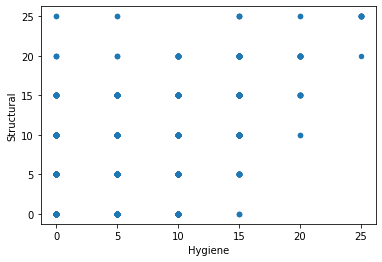

In [38]:
df.plot.scatter('Hygiene','Structural')

In [42]:
from scipy.stats import spearmanr

hygColumn = df['Hygiene']
strucColumn = df['Structural']
(correlation, pValue) = spearmanr(hygColumn, strucColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.5584602421796518
It is statistically significant.


The plot shows there is no clear correlation: there are low hygiene permises with high structural score, and permises with hygiene score less than 15 have almost the full range of the structural score values, from 0 to 25. Towards the  higher end of the Hygien score, the variation diminishes. Above the hygiene score of 15, permises have a structural value greater than 10. 

<AxesSubplot:xlabel='ConfidenceInManagement', ylabel='Structural'>

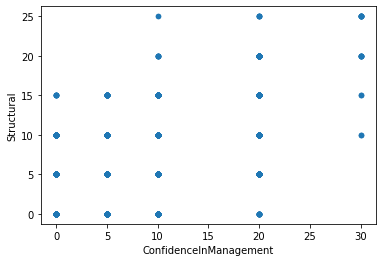

In [39]:
df.plot.scatter('ConfidenceInManagement','Structural')

In [43]:
from scipy.stats import spearmanr

ConfColumn = df['ConfidenceInManagement']
strucColumn = df['Structural']
(correlation, pValue) = spearmanr(ConfColumn, strucColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.535820984562232
It is statistically significant.


The plot shows there is no clear correlation: Permises with a low  
ConfidenceInManagement score tend to have a low Structural score. 
Permises with a ConfidenceInManagement score  equal to 10 and 20 have  the full range of structural values, from 0 to 25. 
No permises have score 15 or 25 in ConfidenceInManagement. For those permises having the maximum ConfidenceInManagement score, their structural score exceeds 10.

<AxesSubplot:xlabel='Hygiene', ylabel='ConfidenceInManagement'>

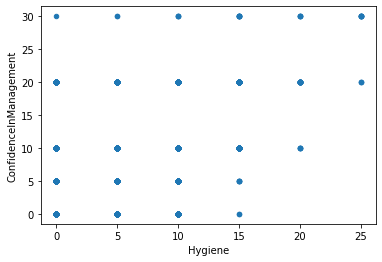

In [41]:
df.plot.scatter('Hygiene','ConfidenceInManagement')

The plot shows there is no clear correlation: Permises with a Hygiene score less thyan 20 have the full range of ConfidenceInManagement values, from 0 to 30. 
For those permises having the maximum hygiene score, their ConfidenceInManagement score exceeds 10.

In [44]:
from scipy.stats import spearmanr

ConfColumn = df['ConfidenceInManagement']
hygColumn = df['Hygiene']
(correlation, pValue) = spearmanr(ConfColumn, hygColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.5793812153186827
It is statistically significant.


In [67]:
(score_perc/score_perc.sum()).round(4)

15    0.2226
10    0.1562
5     0.1393
0     0.1344
20    0.1293
30    0.0711
25    0.0506
35    0.0333
40    0.0197
50    0.0172
45    0.0138
55    0.0062
60    0.0028
70    0.0015
80    0.0011
65    0.0005
75    0.0003
Name: Score, dtype: float64

<AxesSubplot:>

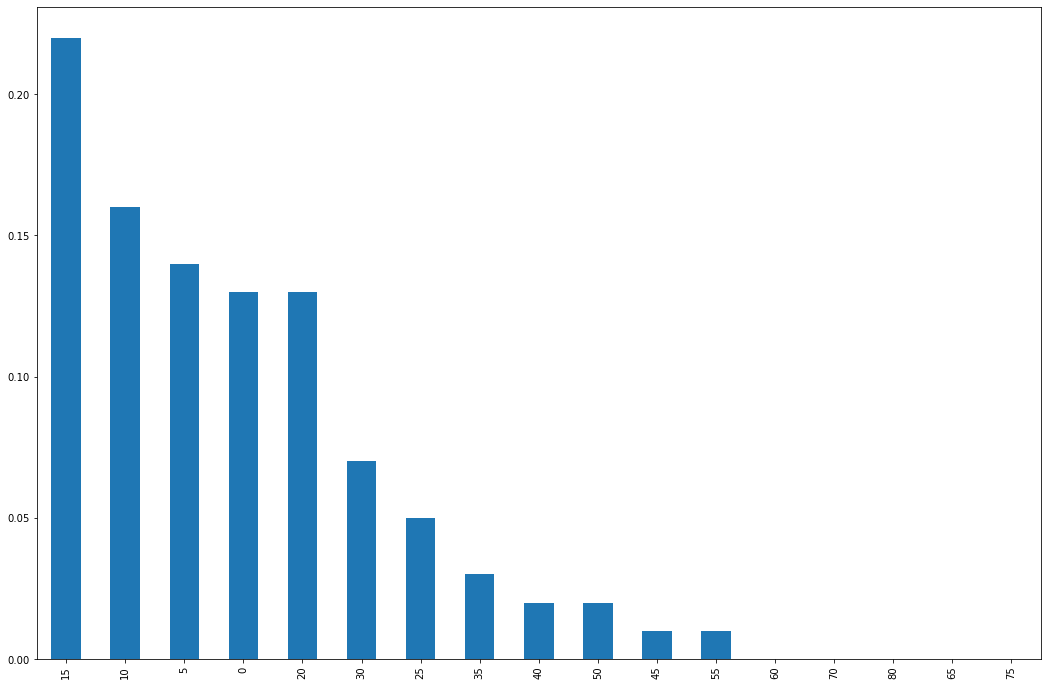

In [68]:
score_perc=df['Score'].value_counts()
(score_perc/score_perc.sum()).round(2).plot(kind='bar', figsize=(18,12))

The overall score of 78% of the permises is less than 25 while about 1.25 % of the permises score over 50.

In [28]:
import re
def uni(x):
    match=re.search('University', x)
    if match != None:
        return True
    else:
        return False
    
df_uni=df[df['BusinessType']=='School/college/university']
indicator=df_uni['BusinessName'].apply(uni).values
df_uni=df_uni[indicator]

df_uni

,BusinessType,BusinessName,LocalAuthorityName,PostCode,Hygiene,Structural,ConfidenceInManagement,Zone,Score
544,School/college/university,Aston University Engineering Academy,Birmingham,B7 4AG,0,15,0,B7,15
955,School/college/university,Birmingham City University,Birmingham,B15 3TN,5,5,5,B15,15
9138,School/college/university,University Of Birmingham,Birmingham,B15 2QT,0,0,0,B15,0
9140,School/college/university,University Of Birmingham,Birmingham,B15 3QR,5,5,5,B15,15


In [29]:
df_uni[df_uni['Score']==df_uni['Score'].max()]['BusinessName'].tolist()

['Aston University Engineering Academy',
 'Birmingham City University',
 'University Of Birmingham']

##### Which college does have the best score?

In [111]:
import re
def uni(x):
    match=re.search('College', x)
    if match != None:
        return True
    else:
        return False
    
df_college=df[df['BusinessType']=='School/college/university']
indicator=df_college['BusinessName'].apply(uni).values
df_college=df_college[indicator]
df_college.head()

,BusinessType,BusinessName,LocalAuthorityName,PostCode,Hygiene,Structural,ConfidenceInManagement,Zone,Score
243,School/college/university,Al-Furqan Community College,Birmingham,B11 3EY,0,0,0,B11,0
971,School/college/university,Birmingham Independent College,Birmingham,B6 5NU,5,5,5,B6,15
976,School/college/university,Birmingham Metropolitan College,Birmingham,B44 8NE,0,0,0,B44,0
977,School/college/university,Birmingham Metropolitan College,Birmingham,B74 2NW,0,0,0,B74,0
1425,School/college/university,Cadbury Sixth Form College,Birmingham,B38 8QT,10,0,10,B38,20


In [112]:
df_college[df_college['Score']==df_college['Score'].max()]['BusinessName'].tolist()

['Cadbury Sixth Form College', 'Victoria College']

### Summary

- The overall score of 78% of the permises is less than 25 while about 1.25 % of the permises score over 50.

- There is no clear correlation among the component scores

- Takeaway/sandwich shops are the most hygienic permises with an average hygiene score of about 7.5, heading Restaurant/Cafe/Canteen with 5.43. Distributors/Transporters came last on the list with 2.33, just after School/college/university.